# Applying Yields and Resolutions

The purpose of this notebook is solely to compare the results to those in `nrCascadeSim`.

In [1]:
#Setup

#External Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
plt.style.use('standard.mplstyle')
from matplotlib.lines import Line2D
#Local Libraries
import sys
sys.path.append('./') #Import stuff from this directory
from hist import histogramable as h #I should really rename this one - shares a name with existing

#Use this to check consistency - to see if I have accidentally changed the results
retrieve = False #True #If you don't know what this does, you should probably leave it alone. For testing configuration only.
seed = 1 #None #You probably want to turn this to "None" if you're not interested in using specific seeds.

dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#Built stuff!

#Select a file.
Gefile = './data/Gefile.txt'

nores = np.ndarray.flatten(np.asarray(h(Gefile,model='None',material='Ge',resolution=None,method='csv',seed=seed)[0]))

#Define a function for formatting the y-axis ticks with scientific notation.
#From https://stackoverflow.com/questions/31517156/adjust-exponent-text-after-setting-scientific-limits-on-matplotlib-axis
def format_exponent(ax, axis='y'):

    # Change the ticklabel format to scientific format
    ax.ticklabel_format(axis=axis, style='sci', scilimits=(-2, 2))

    # Get the appropriate axis
    if axis == 'y':
        ax_axis = ax.yaxis
        x_pos = 0.0
        y_pos = 1.0
        horizontalalignment='left'
        verticalalignment='bottom'
    else:
        ax_axis = ax.xaxis
        x_pos = 1.0
        y_pos = -0.05
        horizontalalignment='right'
        verticalalignment='top'

    # Run plt.tight_layout() because otherwise the offset text doesn't update
    plt.tight_layout()

    # Get the offset value
    offset = ax_axis.get_offset_text().get_text()

    # If there's an offset,
    if len(offset) > 0:
        # Get that exponent value and change it into latex format
        minus_sign = u'\u2212'
        expo = np.float(offset.replace(minus_sign, '-').split('e')[-1])
        offset_text = r'x$\mathregular{10^{%d}}$' %expo

        # Turn off the offset text that's calculated automatically
        ax_axis.offsetText.set_visible(False)

        # Add in a text box at the top of the y axis
        ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
               horizontalalignment=horizontalalignment,
               verticalalignment=verticalalignment,fontsize=30)
    return ax

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/gerudo7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


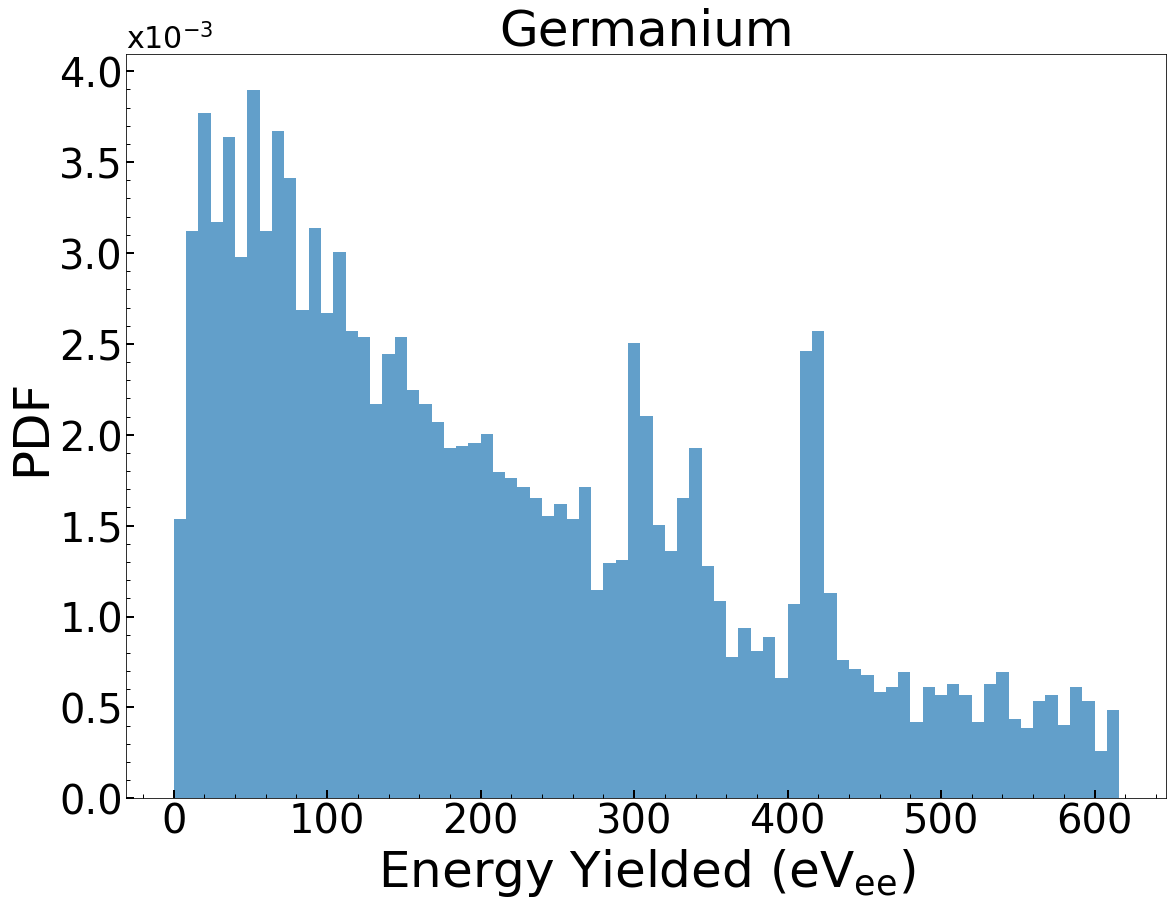

In [3]:
#Plotting!

#Set up to plot
fig, ax = plt.subplots(figsize=(16,12))

#Set up histogram binning.
binsize = 8 #bin width in eVee
bins = np.arange(0,620,binsize)

#Plot data
plt.hist(nores[nores != 0],alpha=0.7,label='No Res (Lindhard)',density='True',linewidth=2,bins=bins)

#Label Axes
plt.xlabel(r"Energy Yielded ($\mathrm{eV}_{\mathrm{ee}}$)",fontsize=50)
plt.ylabel("PDF",fontsize=50)#Counts/(total counts * bin width)")

#Format axis ticks
ax = format_exponent(ax, axis='y')
ax.tick_params(axis='both',which='major',labelsize=40)

#Define plotting region
#plt.xlim([0,200])
#plt.ylim([6e-13,3e-2]) #Make corner less awkward. Smallest starting value that will make the extra 0 go away

#Display everything
#plt.legend(handles=[LindPatch,SorPatch,LindLine,SorLine],fontsize=40)
plt.title('Germanium',fontsize=50)
plt.show()

In [4]:
#Built stuff!

#Select a file.
Sifile = './data/Sifile.txt'

nores = np.ndarray.flatten(np.asarray(h(Sifile,model='None',material='Si',resolution=None,method='csv',seed=seed)[0]))

#Define a function for formatting the y-axis ticks with scientific notation.
#From https://stackoverflow.com/questions/31517156/adjust-exponent-text-after-setting-scientific-limits-on-matplotlib-axis
def format_exponent(ax, axis='y'):

    # Change the ticklabel format to scientific format
    ax.ticklabel_format(axis=axis, style='sci', scilimits=(-2, 2))

    # Get the appropriate axis
    if axis == 'y':
        ax_axis = ax.yaxis
        x_pos = 0.0
        y_pos = 1.0
        horizontalalignment='left'
        verticalalignment='bottom'
    else:
        ax_axis = ax.xaxis
        x_pos = 1.0
        y_pos = -0.05
        horizontalalignment='right'
        verticalalignment='top'

    # Run plt.tight_layout() because otherwise the offset text doesn't update
    plt.tight_layout()

    # Get the offset value
    offset = ax_axis.get_offset_text().get_text()

    # If there's an offset,
    if len(offset) > 0:
        # Get that exponent value and change it into latex format
        minus_sign = u'\u2212'
        expo = np.float(offset.replace(minus_sign, '-').split('e')[-1])
        offset_text = r'x$\mathregular{10^{%d}}$' %expo

        # Turn off the offset text that's calculated automatically
        ax_axis.offsetText.set_visible(False)

        # Add in a text box at the top of the y axis
        ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
               horizontalalignment=horizontalalignment,
               verticalalignment=verticalalignment,fontsize=30)
    return ax

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/gerudo7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


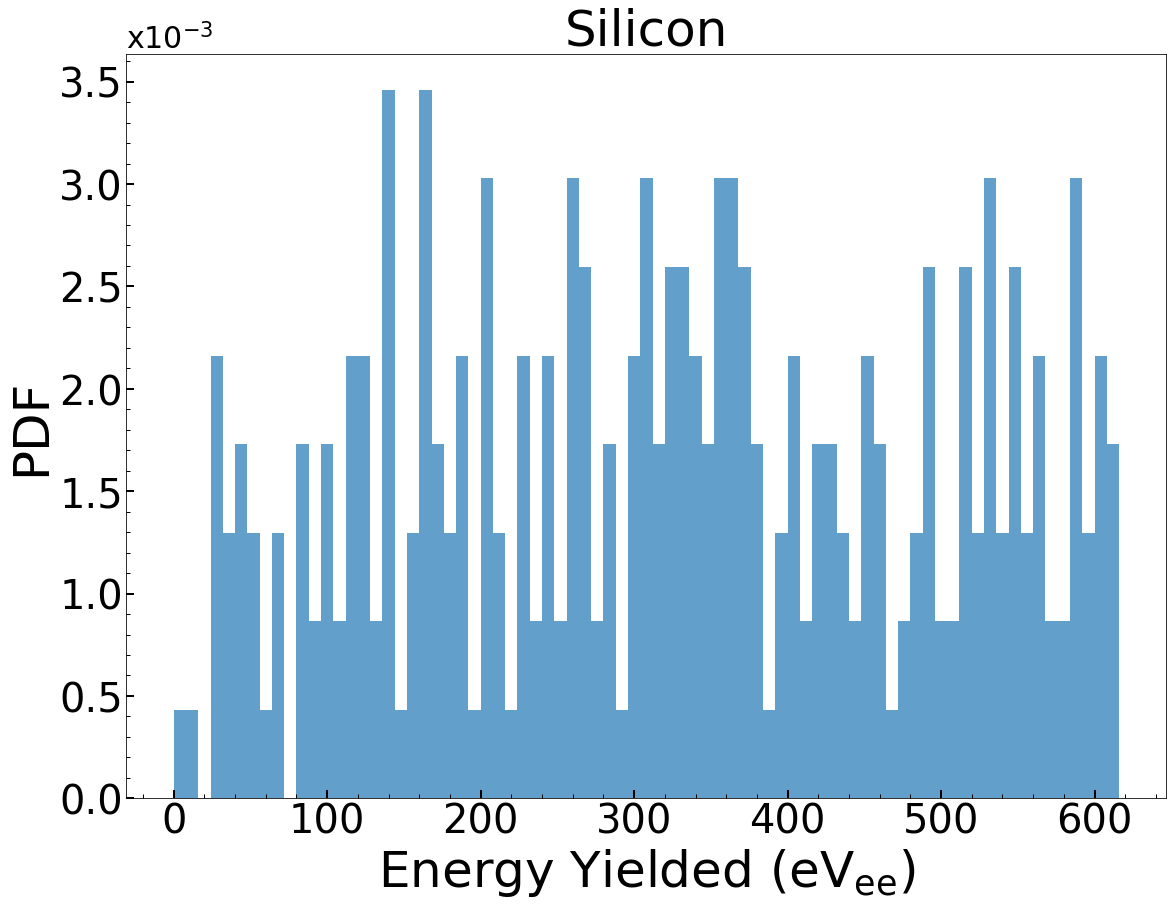

In [5]:
#Plotting!

#Set up to plot
fig, ax = plt.subplots(figsize=(16,12))

#Set up histogram binning.
binsize = 8 #bin width in eVee
bins = np.arange(0,620,binsize)

#Plot data
plt.hist(nores[nores != 0],alpha=0.7,label='No Res (Lindhard)',density='True',linewidth=2,bins=bins)

#Label Axes
plt.xlabel(r"Energy Yielded ($\mathrm{eV}_{\mathrm{ee}}$)",fontsize=50)
plt.ylabel("PDF",fontsize=50)#Counts/(total counts * bin width)")

#Format axis ticks
ax = format_exponent(ax, axis='y')
ax.tick_params(axis='both',which='major',labelsize=40)

#Define plotting region
#plt.xlim([0,200])
#plt.ylim([6e-13,3e-2]) #Make corner less awkward. Smallest starting value that will make the extra 0 go away

#Display everything
#plt.legend(handles=[LindPatch,SorPatch,LindLine,SorLine],fontsize=40)
plt.title('Silicon',fontsize=50)
plt.show()

In [6]:
#Built stuff!

#Select a file.
Sifile = './data/Arfile.txt'

nores = np.ndarray.flatten(np.asarray(h(Sifile,model='None',material='Si',resolution=None,method='csv',seed=seed)[0]))

#Define a function for formatting the y-axis ticks with scientific notation.
#From https://stackoverflow.com/questions/31517156/adjust-exponent-text-after-setting-scientific-limits-on-matplotlib-axis
def format_exponent(ax, axis='y'):

    # Change the ticklabel format to scientific format
    ax.ticklabel_format(axis=axis, style='sci', scilimits=(-2, 2))

    # Get the appropriate axis
    if axis == 'y':
        ax_axis = ax.yaxis
        x_pos = 0.0
        y_pos = 1.0
        horizontalalignment='left'
        verticalalignment='bottom'
    else:
        ax_axis = ax.xaxis
        x_pos = 1.0
        y_pos = -0.05
        horizontalalignment='right'
        verticalalignment='top'

    # Run plt.tight_layout() because otherwise the offset text doesn't update
    plt.tight_layout()

    # Get the offset value
    offset = ax_axis.get_offset_text().get_text()

    # If there's an offset,
    if len(offset) > 0:
        # Get that exponent value and change it into latex format
        minus_sign = u'\u2212'
        expo = np.float(offset.replace(minus_sign, '-').split('e')[-1])
        offset_text = r'x$\mathregular{10^{%d}}$' %expo

        # Turn off the offset text that's calculated automatically
        ax_axis.offsetText.set_visible(False)

        # Add in a text box at the top of the y axis
        ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
               horizontalalignment=horizontalalignment,
               verticalalignment=verticalalignment,fontsize=30)
    return ax

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


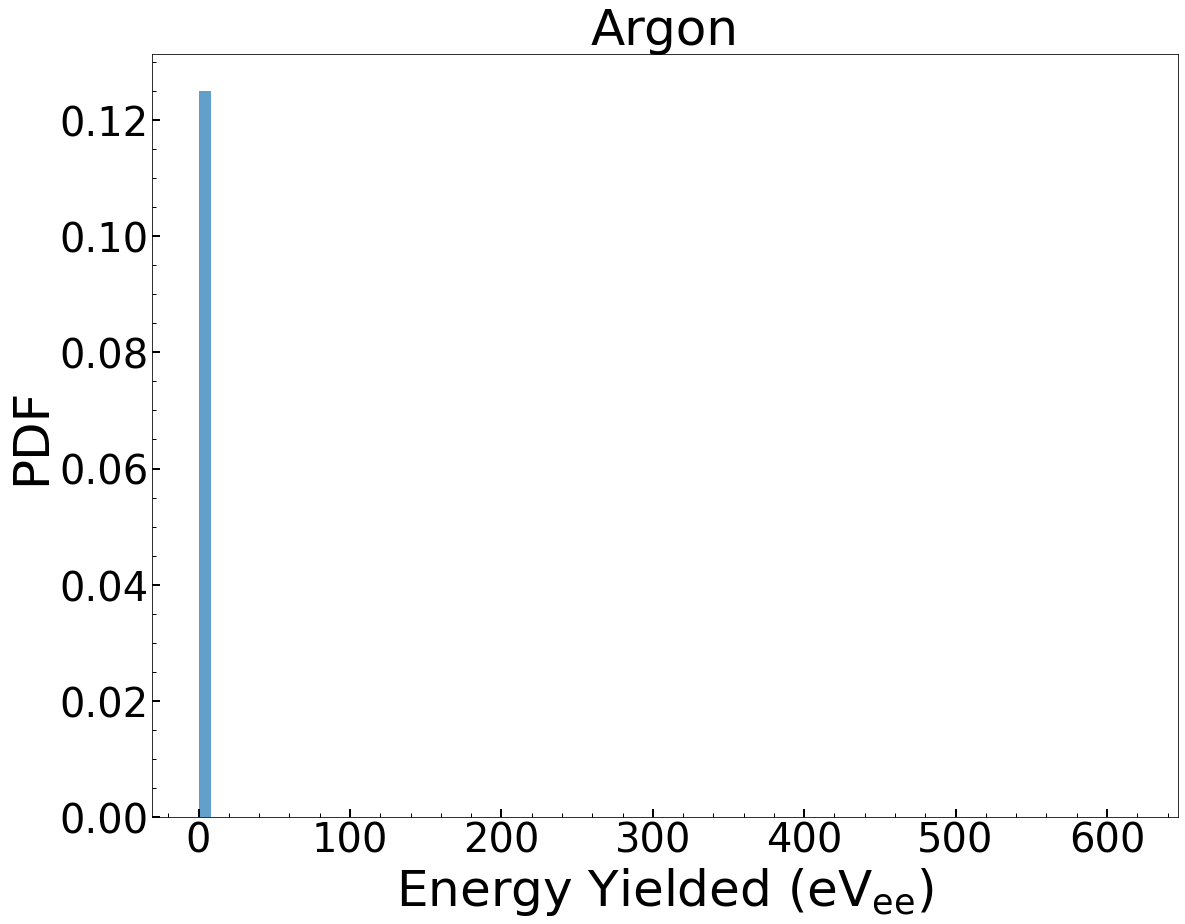

In [7]:
#Plotting!

#Set up to plot
fig, ax = plt.subplots(figsize=(16,12))

#Set up histogram binning.
binsize = 8 #bin width in eVee
bins = np.arange(0,620,binsize)

#Plot data
plt.hist(nores[nores != 0],alpha=0.7,label='No Res (Lindhard)',density='True',linewidth=2,bins=bins)

#Label Axes
plt.xlabel(r"Energy Yielded ($\mathrm{eV}_{\mathrm{ee}}$)",fontsize=50)
plt.ylabel("PDF",fontsize=50)#Counts/(total counts * bin width)")

#Format axis ticks
ax = format_exponent(ax, axis='y')
ax.tick_params(axis='both',which='major',labelsize=40)

#Define plotting region
#plt.xlim([0,200])
#plt.ylim([6e-13,3e-2]) #Make corner less awkward. Smallest starting value that will make the extra 0 go away

#Display everything
#plt.legend(handles=[LindPatch,SorPatch,LindLine,SorLine],fontsize=40)
plt.title('Argon',fontsize=50)
plt.show()

In [8]:
#Built stuff!

#Select a file.
Sifile = './data/Nefile.txt'

nores = np.ndarray.flatten(np.asarray(h(Sifile,model='None',material='Si',resolution=None,method='csv',seed=seed)[0]))

#Define a function for formatting the y-axis ticks with scientific notation.
#From https://stackoverflow.com/questions/31517156/adjust-exponent-text-after-setting-scientific-limits-on-matplotlib-axis
def format_exponent(ax, axis='y'):

    # Change the ticklabel format to scientific format
    ax.ticklabel_format(axis=axis, style='sci', scilimits=(-2, 2))

    # Get the appropriate axis
    if axis == 'y':
        ax_axis = ax.yaxis
        x_pos = 0.0
        y_pos = 1.0
        horizontalalignment='left'
        verticalalignment='bottom'
    else:
        ax_axis = ax.xaxis
        x_pos = 1.0
        y_pos = -0.05
        horizontalalignment='right'
        verticalalignment='top'

    # Run plt.tight_layout() because otherwise the offset text doesn't update
    plt.tight_layout()

    # Get the offset value
    offset = ax_axis.get_offset_text().get_text()

    # If there's an offset,
    if len(offset) > 0:
        # Get that exponent value and change it into latex format
        minus_sign = u'\u2212'
        expo = np.float(offset.replace(minus_sign, '-').split('e')[-1])
        offset_text = r'x$\mathregular{10^{%d}}$' %expo

        # Turn off the offset text that's calculated automatically
        ax_axis.offsetText.set_visible(False)

        # Add in a text box at the top of the y axis
        ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
               horizontalalignment=horizontalalignment,
               verticalalignment=verticalalignment,fontsize=30)
    return ax

/home/gerudo7/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/gerudo7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


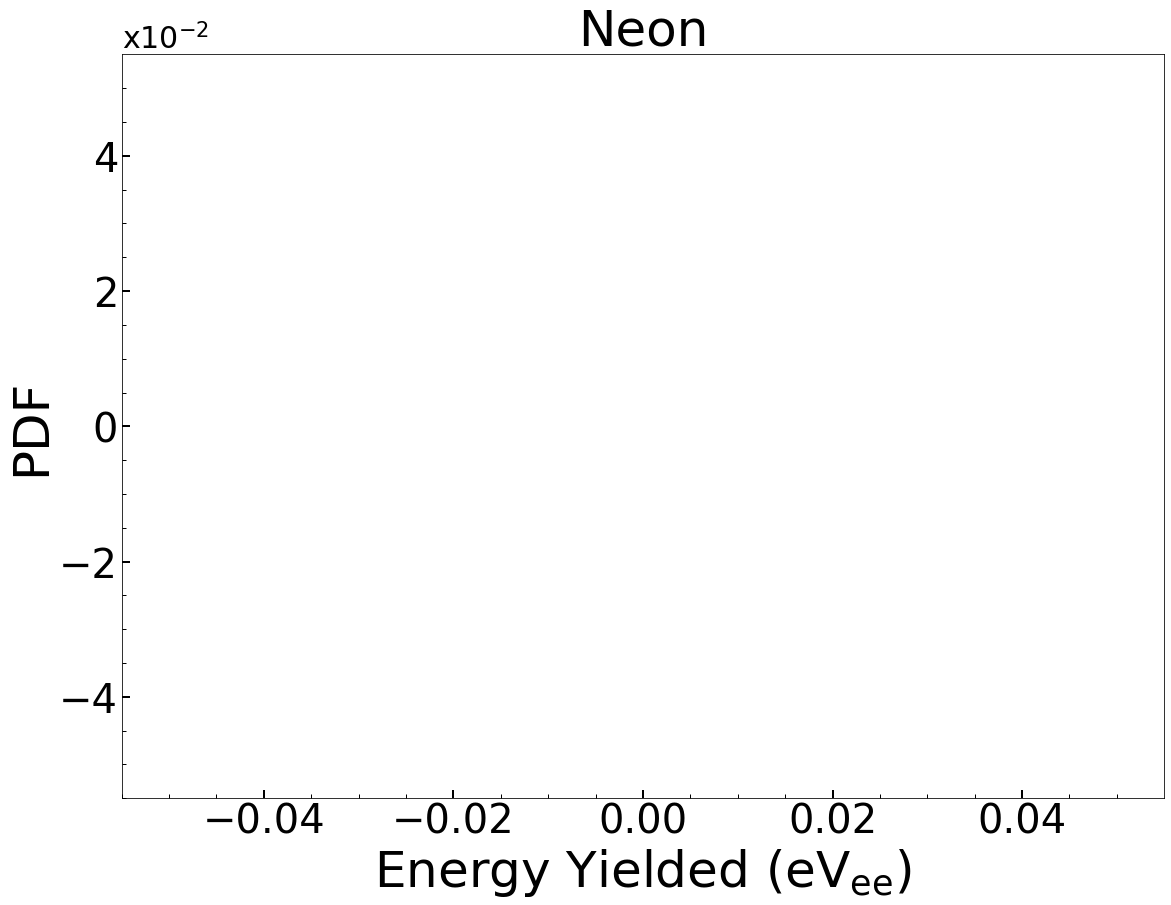

In [9]:
#Plotting!

#Set up to plot
fig, ax = plt.subplots(figsize=(16,12))

#Set up histogram binning.
binsize = 8 #bin width in eVee
bins = np.arange(0,620,binsize)

#Plot data
plt.hist(nores[nores != 0],alpha=0.7,label='No Res (Lindhard)',density='True',linewidth=2,bins=bins)

#Label Axes
plt.xlabel(r"Energy Yielded ($\mathrm{eV}_{\mathrm{ee}}$)",fontsize=50)
plt.ylabel("PDF",fontsize=50)#Counts/(total counts * bin width)")

#Format axis ticks
ax = format_exponent(ax, axis='y')
ax.tick_params(axis='both',which='major',labelsize=40)

#Define plotting region
#plt.xlim([0,200])
#plt.ylim([6e-13,3e-2]) #Make corner less awkward. Smallest starting value that will make the extra 0 go away

#Display everything
#plt.legend(handles=[LindPatch,SorPatch,LindLine,SorLine],fontsize=40)
plt.title('Neon',fontsize=50)
plt.show()